In [9]:
# Atree is the matrix 
# Atree[::2,::2,::2]
# ADD S- to make search more efficient DONE
# Print Color of RGB or box of the color that specific ■ DONE
# Do not go duplicates folder DONE
# search through both DONE
(
# create excel or word documnet to show how many files and do prifiling within each case
# once you read and unravel
# Save all considered files under one of these three
# If there are multiple finals then rename them as SS-Segementations-n+1.nii.gz
# SS-Case-34-Seeds-2-Label.nii.gz  xN
# SS-Case-34-Segmentation-7-Label.nii.gz  xM
# SS-Case-34-Final-Label.nii.gz 
# if s-final date of mofied is > s-finalseg by 3 days: WARN*
# Create snapshot as final golden standard of quality assurance
# Want to potentially run this code often because we may be correct some of the segmentations
# Also may want to save these to a different location than D-Images
# MAKE SURE THAT EVERY CASE THAT IS SUPPOSED TO READ IS READ WHICH COULD BE AN ERROR IF THEY ARE OVERLAPPING
# Print number of files/folders not processed and proccessed 
# Print and and number the files that are proccessed themselves 
# Indent 
# Make font courier new
# update outputs frequently
# save outputs to two different locations
)
# COLORS: DONE
# Aseed = (0.8470588, 0.396078, 0.309803) DONE
# Vseed = (0, 0.592156, 0.807843) DONE
# Miscellaneous = (.90196, 0.86274, .27451) DONE


()

In [ ]:
# QUESTIONS
# Change all .nrrd files to nii.gz
# Save all images to separate case folders like the other code
# Change all segments to Aseed and Vseed (get rid of Misc?) THEY ARE LABELS DUH 
# 
# ^^^ Step above requires deleting Misc (JUST SAVE A AND V) IGNORE MISC
# Where is code to show mayavi viewer quickly 
#
# Write to excel first 
# 
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#


In [ ]:
# MOST CURRENT STATE OF CODE 11/1/2023 9:15 pm
# TESTING GOLD STANDARD NEED TO ADD VISUALIZATION AND PRINT TO WORD DOCUMENT (ADD SEARCH THROUGH ALL CASES FUNCTION TO BOTTOM OF THIS CODE)
# INTEGRATE (#GOLD STANDARD TO SAVE IMAGE OF FIGURE IN GIANT VIEWER WITH NII.GZ) to code mention above ^^^^^^^^
# COME UP WITH A WAY TO FIND THE Aseed and Vseed using some sort of indicator given the zoo diversity using these aspects(color, size, name)
# CREATE RAVELED_A = Aseed SEGMENT 
# CREATE RAVELED_V = Vseed SEGMENT 
# Show raveled Aseed as Blue
# Show raveled Vseed as Red
# Put final word document in reports
# at the top make a comment that makes the code easy to use and understandable
# make sure code works and classifys files into three categories
# pick the last final index and everything else renamed to segmentation
# using counting it should be segmentations and codes
# add red (SS-segm.nii.gz) to rename

## NEED TO UNRAVEL BEFORE I CAN ADD VISUALIZATION TO CODE OR TALK TO SOHEIL

In [ ]:
# SEARCH THROUGH ALL CASES FUNCTION

# def search_and_process(base_path):
#     for root, dirs, files in os.walk(base_path):
#         for dir_name in dirs:
#             if dir_name == "1-Duplicates":
#                 continue
#             if dir_name.startswith("Case-"):
#                 for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
#                     for sub_dir_name in sub_dirs:
#                         if sub_dir_name.startswith("88-"):
#                             process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
# 

In [ ]:
# MOST CURRENT STATE OF CODE 11/3/2023 1:03 PM
# Create Voxel Counts
# Now try to show first segmentation
# Do so by unraveleing
# that means picking the segments by some sort of indication (voxel value, color, name)
# add dimensions and spacing of the image spacing
# continue 
# Add Date of Creation or date of modification 

In [28]:
#1 Import Modules and Define Constants

# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
from docx.shared import RGBColor
from docx.shared import Pt
import time
from datetime import datetime
import nrrd
from mayavi import mlab
from docx.shared import Inches, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT



COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()
# doc = Document("z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx")

In [29]:
#2 Function to write data to Word document
def write_to_word(text, bold=False, indent_level=0, font_color=None):
    paragraph = doc.add_paragraph(text)
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    run = paragraph.runs[0]
    if bold:
        run.bold = True
    font = run.font
    font.name = 'Courier New'
    font.size = Pt(12)
    if font_color:
        # Check if the font_color is a named color
        if isinstance(font_color, str) and font_color in COLORS_DICT:
            r, g, b = COLORS_DICT[font_color]
        else:
            r, g, b = font_color
        font.color.rgb = RGBColor(r, g, b)
  

In [30]:
#3 add word to image
# def add_image_to_word(image_path, width=None):
#     try:
#         # Add an image to the Word document
#         if width:
#             doc.add_picture(image_path, width=Inches(width))
#         else:
#             doc.add_picture(image_path)  # Automatically uses the image's size
#     except Exception as e:
#         print(f"An error occurred while adding the image: {e}")


def add_image_to_word(image_path, width=None):
    try:
        # Create a new paragraph for the image
        image_paragraph = doc.add_paragraph()
        image_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

        # Add an image to the Word document
        if width:
            run = image_paragraph.add_run()
            run.add_picture(image_path, width=Inches(width))
        else:
            run = image_paragraph.add_run()
            run.add_picture(image_path)  # Automatically uses the image's size

    except Exception as e:
        print(f"An error occurred while adding the image: {e}")



In [31]:
#4 Function to Get Image Details
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=5, font_color='orange')
    write_to_word(spacing_output, indent_level=5, font_color='orange')

In [32]:
#5 Extract segment information for labels
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None

In [33]:
#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

In [34]:
#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    # if len(segment_names) > 3:
    #     print(f"Warning: More than three segments found in {case_path}. Skipping file.")
    #     return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

In [35]:
#8 Visualization

def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled seagments for 'A' and 'V'
        

        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        # Visualize the Unraveled_A segment
        # DecimatedUnraveled_A = Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor]
        # if any(DecimatedUnraveled_A)
        # mlab.contour3d(DecimatedUnraveled_A,
        #             contours=[0.5], color=color_a, opacity=OP)

        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

   
        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 

    



        # mlab.savefig(snapshot_path)
        
        # mlab.close()
        # print(f"Snapshot saved to {snapshot_path}")
    
    # except Exception as e:
    #     print(f"An error occurred while processing {case_path}:") 
        
        # Optionally, close the figure if it's open and an error occurs
        # mlab.close()

In [36]:
#9 Print Filtered Nrrd Header

def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=8, font_color='orange')

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"Segment {seg_num} LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=10, font_color=(r,g,b))  # Write the segment name without '■'
            
            # Add other attributes
            write_to_word(segment_id, indent_level=10)
            write_to_word(segment_color, indent_level=10)
            write_to_word(segment_label_value, indent_level=10)
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Segment {seg_num} Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=10)

            write_to_word(" ")
    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)

In [37]:
#10 Process Nrrd File in folder 
def process_nrrd_files_in_folder(folder_path):

    files_and_subdirs = os.listdir(folder_path)
    output_text = f"Folder Path: {folder_path}"
    print(output_text)
    write_to_word(output_text, bold=True)
    write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files/Folders NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=10, font_color='blue')

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")

    for item in files_and_subdirs:
        if item.startswith("S-"):
            full_item_path = os.path.join(folder_path, item)
            if os.path.isfile(full_item_path) and item.endswith('.nrrd'):
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"Processing: {item}"
                output_filename_NIFTI = item.replace("S-Final", "SS-Final").replace(".nrrd", ".nii.gz")
                output_filename_save = "→ ", output_filename_NIFTI
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=5)
                write_to_word(output_filename_save, bold=True, indent_level=6, font_color='red')
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=5, font_color='orange')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                write_to_word(' ')
                


                new_case_path, snapshot_directory_of_png = visualize_nrrd_and_save_snapshot(full_item_path, snapshot_directory)
                add_image_to_word(snapshot_directory_of_png, width=3)     



                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=8, font_color=font_color_val)
                        for i in range(num_segments):
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"  Name: {segment_names[i]}",
                                f"  Label Value: {label_values[i]}"
                                f"  Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=10, font_color=font_color_val)
                        write_to_word(" ")

                            
                else:
                    print_filtered_nrrd_header(image, data)


In [211]:
#10.5 Search and Process Files For specific files
def search_and_process(base_path, max_cases=1):
    processed_cases = 0  # Counter to keep track of processed cases
    
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                if dir_name[5:7] in ['77']:
                # if int(dir_name[5:7]) in range(10:20):
                    for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                        for sub_dir_name in sub_dirs:
                            if sub_dir_name.startswith("88-"):
                                process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                                processed_cases += 1  # Increment the counter
                                if processed_cases >= max_cases:
                                    return 


In [25]:
#11 Search and Process Files 
def search_and_process(base_path, max_cases=1):
    processed_cases = 0  # Counter to keep track of processed cases
    
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                    for sub_dir_name in sub_dirs:
                        if sub_dir_name.startswith("88-"):
                            process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                            processed_cases += 1  # Increment the counter
                            if processed_cases >= max_cases:
                                return 


In [38]:
#100 GOLD STANDARD CODE ALL IN ONE

# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
from docx.shared import RGBColor
from docx.shared import Pt
import time
from datetime import datetime
import nrrd
from mayavi import mlab
from docx.shared import Inches, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT



COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()
# doc = Document("z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx")




#2 Function to write data to Word document
def write_to_word(text, bold=False, indent_level=0, font_color=None):
    paragraph = doc.add_paragraph(text)
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    run = paragraph.runs[0]
    if bold:
        run.bold = True
    font = run.font
    font.name = 'Courier New'
    font.size = Pt(12)
    if font_color:
        # Check if the font_color is a named color
        if isinstance(font_color, str) and font_color in COLORS_DICT:
            r, g, b = COLORS_DICT[font_color]
        else:
            r, g, b = font_color
        font.color.rgb = RGBColor(r, g, b)
  

#3

def add_image_to_word(image_path, width=None):
    try:
        # Create a new paragraph for the image
        image_paragraph = doc.add_paragraph()
        image_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

        # Add an image to the Word document
        if width:
            run = image_paragraph.add_run()
            run.add_picture(image_path, width=Inches(width))
        else:
            run = image_paragraph.add_run()
            run.add_picture(image_path)  # Automatically uses the image's size

    except Exception as e:
        print(f"An error occurred while adding the image: {e}")



#4 Function to Get Image Details
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=5, font_color='orange')
    write_to_word(spacing_output, indent_level=5, font_color='orange')




    #5 Extract segment information for labels
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None
    

#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None


#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    # if len(segment_names) > 3:
    #     print(f"Warning: More than three segments found in {case_path}. Skipping file.")
    #     return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

#8 Visualization

def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled seagments for 'A' and 'V'
        

        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))


        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

   
        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 


#9 Print Filtered Nrrd Header

def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=8, font_color='orange')

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"Segment {seg_num} LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=10, font_color=(r,g,b))  # Write the segment name without '■'
            
            # Add other attributes
            write_to_word(segment_id, indent_level=10)
            write_to_word(segment_color, indent_level=10)
            write_to_word(segment_label_value, indent_level=10)
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Segment {seg_num} Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=10)

            write_to_word(" ")
    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)




#10 Process Nrrd File in folder 
def process_nrrd_files_in_folder(folder_path):

    files_and_subdirs = os.listdir(folder_path)
    output_text = f"Folder Path: {folder_path}"
    print(output_text)
    write_to_word(output_text, bold=True)
    write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files/Folders NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=10, font_color='blue')

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")

    for item in files_and_subdirs:
        if item.startswith("S-"):
            full_item_path = os.path.join(folder_path, item)
            if os.path.isfile(full_item_path) and item.endswith('.nrrd'):
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"Processing: {item}"
                output_filename_NIFTI = item.replace("S-Final", "SS-Final").replace(".nrrd", ".nii.gz")
                output_filename_save = "→ ", output_filename_NIFTI
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=5)
                write_to_word(output_filename_save, bold=True, indent_level=6, font_color='red')
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=5, font_color='orange')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                write_to_word(' ')
                


                new_case_path, snapshot_directory_of_png = visualize_nrrd_and_save_snapshot(full_item_path, snapshot_directory)
                add_image_to_word(snapshot_directory_of_png, width=3)     



                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=8, font_color=font_color_val)
                        for i in range(num_segments):
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"  Name: {segment_names[i]}",
                                f"  Label Value: {label_values[i]}"
                                f"  Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=10, font_color=font_color_val)
                        write_to_word(" ")

                            
                else:
                    print_filtered_nrrd_header(image, data)



#11 Search and Process Files 
def search_and_process(base_path, max_cases=1):
    processed_cases = 0  # Counter to keep track of processed cases
    
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                    for sub_dir_name in sub_dirs:
                        if sub_dir_name.startswith("88-"):
                            process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                            processed_cases += 1  # Increment the counter
                            if processed_cases >= max_cases:
                                return 

        
    #12 Define the directory path and call all functions previously
base_folder_path = "z:/D-Images/"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
search_and_process(base_folder_path)

# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx')

In [39]:
#12 Define the directory path and call all functions previously
base_folder_path = "z:/D-Images/"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
search_and_process(base_folder_path)

# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx')

Folder Path: z:/D-Images/MESAL-3\2-Checked-Done-Temp\Done\Case-01-MESAL-5010098-E3\Markups\88-Nate
Files/Folders NOT being processed: 4
1. Complicated Points.mrk.json
2. F.mrk.json
3. QC.mrk.json
4. Vx3.nrrd
Files being processed: 9
1. S-Final-1-label.nrrd
2. S-Final-1.nrrd
3. S-Final-3.seg.nrrd
4. S-Seeds-1.seg.nrrd
5. S-Segmentation-1.seg.nrrd
6. S-Segmentation-2.seg.nrrd
7. S-Segmentation-3.seg.nrrd
8. S-Segmentation-5.seg.nrrd
9. S-Segmentation-6.seg.nrrd
Processing: S-Final-1-label.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-1-label.png
Number of Segments: 3
Segment 1:
  Name: Segment_0
  Label Value: 0  Voxel Count: 173,937,462
Segment 2:
  Name: Segment_1
  Label Value: 1  Voxel Count: 1,473,757
Segment 3:
  Name: Segment_2
  Label Value: 2  Voxel Count: 2,733,781
Processing: S-Final-1.nrrd
Dimensions: 625 x 451 x 632
Spacing: 

In [3]:
import os
import re

def get_file_number(file_name):
    # Extract the number from the filename using regex
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else None

def rename_files_in_directory(directory_path):
    # List all files in the directory
    all_files = os.listdir(directory_path)
    
    # Filter out the files that match the 'S-' prefix and '.nrrd' suffix
    s_files = [f for f in all_files if f.startswith('S-') and f.endswith('.nrrd')]
    
    # Separate the files into their respective categories
    seeds_files = sorted([f for f in s_files if 'S-Seeds' in f], key=get_file_number)
    segmentation_files = sorted([f for f in s_files if 'S-Segmentation' in f], key=get_file_number)
    final_files = sorted([f for f in s_files if 'S-Final-' in f and '-label' not in f], key=get_file_number)
    
    # Identify and remove the label files
    label_files = [f for f in s_files if '-label.nrrd' in f]
    for label_file in label_files:
        os.remove(os.path.join(directory_path, label_file))
        print(f'Removed label file: {label_file}')
    
    # Rename 'S-Seeds-N.nrrd' files
    for i, file_name in enumerate(seeds_files, start=1):
        new_name = f"S-Seeds-{i}.nrrd"
        print(f'Renaming "{file_name}" to "{new_name}"')
        os.rename(os.path.join(directory_path, file_name), os.path.join(directory_path, new_name))

    # Rename 'S-Segmentation-N.nrrd' files
    for i, file_name in enumerate(segmentation_files, start=1):
        new_name = f"S-Segmentation-{i}.nrrd"
        print(f'Renaming "{file_name}" to "{new_name}"')
        os.rename(os.path.join(directory_path, file_name), os.path.join(directory_path, new_name))

    # Rename 'S-Final-N.nrrd' files into 'S-Segmentation' series
    if final_files:  # Check if there are any final files
        # Rename all but the last 'S-Final' file into the 'S-Segmentation' series
        for file_name in final_files[:-1]:  # Skip the last file
            next_seg_num = len(segmentation_files) + 1
            new_name = f"S-Segmentation-{next_seg_num}.nrrd"
            print(f'Renaming "{file_name}" to "{new_name}"')
            os.rename(os.path.join(directory_path, file_name), os.path.join(directory_path, new_name))
            segmentation_files.append(new_name)  # Add new name to the list to continue the sequence
        
        # Rename the last 'S-Final' file to just 'S-Final.nrrd'
        highest_final_file = final_files[-1]
        new_final_name = "S-Final.nrrd"
        print(f'Renaming "{highest_final_file}" to "{new_final_name}"')
        os.rename(os.path.join(directory_path, highest_final_file), os.path.join(directory_path, new_final_name))

    print("Renaming complete.")

# Example usage:
directory_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-53-Spiromics-46195695/Markups/91-Nate/'
rename_files_in_directory(directory_path)

# This code is ready to be tested in your environment. 
# Remember to set the 'directory_path' variable to the path of your testing directory before running.



Renaming "S-Seeds-1.nrrd" to "S-Seeds-1.nrrd"
Renaming "S-Seeds-2.nrrd" to "S-Seeds-2.nrrd"
Renaming "S-Segmentation-1.nrrd" to "S-Segmentation-1.nrrd"
Renaming "S-Segmentation-2.nrrd" to "S-Segmentation-2.nrrd"
Renaming "S-Segmentation-3.nrrd" to "S-Segmentation-3.nrrd"
Renaming "S-Segmentation-5.nrrd" to "S-Segmentation-4.nrrd"
Renaming "S-Segmentation-50.nrrd" to "S-Segmentation-5.nrrd"
Renaming "S-Segmentation-61.nrrd" to "S-Segmentation-6.nrrd"
Renaming "S-Final-8.nrrd" to "S-Segmentation-7.nrrd"
Renaming "S-Final-91.nrrd" to "S-Final.nrrd"
Renaming complete.


In [8]:
import os
import re
import shutil

def get_file_number(file_name):
    # Extract the number from the filename using regex
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else None

def copy_and_rename_files(directory_path, new_directory_path):
    # Create the new directory if it doesn't exist
    if not os.path.exists(new_directory_path):
        os.makedirs(new_directory_path)
        print(f'Created new directory: {new_directory_path}')
    
    # List all files in the original directory
    all_files = os.listdir(directory_path)
    
    # Filter out the files that match the 'S-' prefix and '.nrrd' suffix
    s_files = [f for f in all_files if f.startswith('S-') and f.endswith('.nrrd')]
    
    # Separate the files into their respective categories
    seeds_files = sorted([f for f in s_files if 'S-Seeds' in f], key=get_file_number)
    segmentation_files = sorted([f for f in s_files if 'S-Segmentation' in f], key=get_file_number)
    final_files = sorted([f for f in s_files if 'S-Final-' in f and '-label' not in f], key=get_file_number)
    
    # Process 'S-Seeds-N.nrrd' files
    for i, file_name in enumerate(seeds_files, start=1):
        new_name = f"S-Seeds-{i}.nrrd"
        shutil.copy(os.path.join(directory_path, file_name), os.path.join(new_directory_path, new_name))
        print(f'Copied and renamed "{file_name}" to "{new_name}"')
    
    # Process 'S-Segmentation-N.nrrd' files
    for i, file_name in enumerate(segmentation_files, start=1):
        new_name = f"S-Segmentation-{i}.nrrd"
        shutil.copy(os.path.join(directory_path, file_name), os.path.join(new_directory_path, new_name))
        print(f'Copied and renamed "{file_name}" to "{new_name}"')
    
    # Process 'S-Final-N.nrrd' files
    if final_files:
        # Copy and rename all but the last 'S-Final' file
        for file_name in final_files[:-1]:
            next_seg_num = len(segmentation_files) + 1
            new_name = f"S-Segmentation-{next_seg_num}.nrrd"
            shutil.copy(os.path.join(directory_path, file_name), os.path.join(new_directory_path, new_name))
            print(f'Copied and renamed "{file_name}" to "{new_name}"')
            segmentation_files.append(new_name)  # To keep track of the new numbering
            
        # Copy the last 'S-Final' file and rename it to 'S-Final.nrrd'
        highest_final_file = final_files[-1]
        new_final_name = "S-Final.nrrd"
        shutil.copy(os.path.join(directory_path, highest_final_file), os.path.join(new_directory_path, new_final_name))
        print(f'Copied and renamed "{highest_final_file}" to "{new_final_name}"')

    print("Copying and renaming complete.")

# Example usage:
original_directory_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-53-Spiromics-46195695/Markups/90-Nate/'
new_directory_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-53-Spiromics-46195695/Markups/91-Nate/'
copy_and_rename_files(original_directory_path, new_directory_path)


#if its none of those spit an error.!!!
# Set the 'original_directory_path' to your source directory and 'new_directory_path' to your destination directory before running.


Copied and renamed "S-Seeds-1.seg.nrrd" to "S-Seeds-1.nrrd"
Copied and renamed "S-Segmentation-1.seg.nrrd" to "S-Segmentation-1.nrrd"
Copied and renamed "S-Segmentation-2.seg.nrrd" to "S-Segmentation-2.nrrd"
Copied and renamed "S-Segmentation-4.seg.nrrd" to "S-Segmentation-3.nrrd"
Copied and renamed "S-Segmentation-5.seg.nrrd" to "S-Segmentation-4.nrrd"
Copied and renamed "S-Final-1.seg.nrrd" to "S-Final.nrrd"
Copying and renaming complete.


directory_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-53-Spiromics-46195695/Markups/91-Nate/'
rename_files_in_directory(directory_path)

In [ ]:

#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    if len(segment_names) > 3:
        print(f"Warning: More than three segments found in {case_path}. Skipping file.")
        return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True


#8 Visualization

def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled segments for 'A' and 'V'
        

        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        # Visualize the Unraveled_A segment
        # DecimatedUnraveled_A = Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor]
        # if any(DecimatedUnraveled_A)
        # mlab.contour3d(DecimatedUnraveled_A,
        #             contours=[0.5], color=color_a, opacity=OP)
        mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)
        # Visualize the Unraveled_V segment
        mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

   
        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 

    



        # mlab.savefig(snapshot_path)
        
        # mlab.close()
        # print(f"Snapshot saved to {snapshot_path}")
    
    # except Exception as e:
    #     print(f"An error occurred while processing {case_path}:") 
        
        # Optionally, close the figure if it's open and an error occurs
        # mlab.close()

In [20]:
#1 Golden STANDARD NEED TO ADD VISUALIZATION AND PRINT TO WORD DOCUMENT 
# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
from docx.shared import RGBColor
from docx.shared import Pt
import time
from datetime import datetime


COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()


#2 Function to write data to Word document
def write_to_word(text, bold=False, indent_level=0, font_color=None):
    paragraph = doc.add_paragraph(text)
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    run = paragraph.runs[0]
    if bold:
        run.bold = True
    font = run.font
    font.name = 'Courier New'
    font.size = Pt(12)
    if font_color:
        # Check if the font_color is a named color
        if isinstance(font_color, str) and font_color in COLORS_DICT:
            r, g, b = COLORS_DICT[font_color]
        else:
            r, g, b = font_color
        font.color.rgb = RGBColor(r, g, b)
  
#3
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=5, font_color='orange')
    write_to_word(spacing_output, indent_level=5, font_color='orange')

#4
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None

#5
def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=8, font_color='orange')

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"Segment {seg_num} LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=10, font_color=(r,g,b))  # Write the segment name without '■'
            
            # Add other attributes
            write_to_word(segment_id, indent_level=10)
            write_to_word(segment_color, indent_level=10)
            write_to_word(segment_label_value, indent_level=10)
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Segment {seg_num} Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=10)

            write_to_word(" ")
    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)

def process_nrrd_files_in_folder(folder_path):

    files_and_subdirs = os.listdir(folder_path)
    output_text = f"Folder Path: {folder_path}"
    print(output_text)
    write_to_word(output_text, bold=True)
    write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files/Folders NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=10, font_color='blue')

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")

    for item in files_and_subdirs:
        if item.startswith("S-"):
            full_item_path = os.path.join(folder_path, item)
            if os.path.isfile(full_item_path) and item.endswith('.nrrd'):
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"Processing: {item}"
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=5)
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=5, font_color='orange')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                write_to_word(' ')
                
                # MAking the 3d and 
                RaveledA, RaveledV = UnraveledAVAs01(SegImage)
                import mayavi
                mlab.figure()
                mlab.contour3d(RaveledA, contour = [0.5], blue)
                mlab.contour3d(Raveledv, contour = [0.5], red)
                mlab.savefig()
                write_to_word.image(snapshot locatoion)

                # Placing the coronal snapshot with segments overlaid









                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=8, font_color=font_color_val)
                        for i in range(num_segments):
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"  Name: {segment_names[i]}",
                                f"  Label Value: {label_values[i]}"
                                f"  Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=10, font_color=font_color_val)
                        write_to_word(" ")

                            
                else:
                    print_filtered_nrrd_header(image, data)

def search_and_process(base_path, max_cases=2):
    processed_cases = 0  # Counter to keep track of processed cases
    
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                    for sub_dir_name in sub_dirs:
                        if sub_dir_name.startswith("88-"):
                            process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                            processed_cases += 1  # Increment the counter



# Define the directory path
base_folder_path = "z:/D-Images"
search_and_process(base_folder_path)

# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx')


Folder Path: z:/D-Images\MESAL-3\2-Checked-Done-Temp\Done\Case-01-MESAL-5010098-E3\Markups\88-Nate
Files/Folders NOT being processed: 4
1. Complicated Points.mrk.json
2. F.mrk.json
3. QC.mrk.json
4. Vx3.nrrd
Files being processed: 9
1. S-Final-1-label.nrrd
2. S-Final-1.nrrd
3. S-Final-3.seg.nrrd
4. S-Seeds-1.seg.nrrd
5. S-Segmentation-1.seg.nrrd
6. S-Segmentation-2.seg.nrrd
7. S-Segmentation-3.seg.nrrd
8. S-Segmentation-5.seg.nrrd
9. S-Segmentation-6.seg.nrrd
Processing: S-Final-1-label.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Number of Segments: 3
Segment 1:
  Name: Segment_0
  Label Value: 0  Voxel Count: 173,937,462
Segment 2:
  Name: Segment_1
  Label Value: 1  Voxel Count: 1,473,757
Segment 3:
  Name: Segment_2
  Label Value: 2  Voxel Count: 2,733,781
Processing: S-Final-1.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Number of Segments: 3
Total Voxel Count: 178,145,000
Processing: S-Final-3.seg.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.3

In [94]:
# TESTING GOLD STANDARD


import nrrd
from mayavi import mlab
import os
import numpy as np

def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    if len(segment_names) > 3:
        print(f"Warning: More than three segments found in {case_path}. Skipping file.")
        return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled segments for 'A' and 'V'
        

        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        # Visualize the Unraveled_A segment
        mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

        # Extract the desired folder and file names from the case_path
        case_directory_name = case_path.split('/')[-4]  # Assuming the format of CasePath remains consistent
        base_file_name = os.path.basename(case_path).replace('.nrrd', '.png')
        final_file_name = case_directory_name + "-" + base_file_name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path,final_file_name)
        
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
    
    except Exception as e:
        print(f"An error occurred while processing {case_path}:") 
        
        # Optionally, close the figure if it's open and an error occurs
        mlab.close()

def process_directory(directory, snapshot_directory):
    # Iterate through all files in the specified directory
    for filename in os.listdir(directory):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Check if it is a file and has a .nrrd extension
        if os.path.isfile(file_path) and file_path.lower().endswith('.nrrd'):
            print(f"Processing file: {file_path}")
            try:
                visualize_nrrd_and_save_snapshot(file_path, snapshot_directory)
            except Exception as e:
                print(f"An error occurred while processing {file_path}: {e}")
               
# Example usage
case_directory = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/NATE-TEST-TEMP/"  # Directory containing NRRD files
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
process_directory(case_directory, snapshot_directory)


Processing file: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/NATE-TEST-TEMP/NATE-TEST-TEMP-WRONGLABELMAP-label.nrrd
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-NATE-TEST-TEMP-WRONGLABELMAP-label.png
Processing file: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/NATE-TEST-TEMP/S-Segmentation-1(NamedWrong).seg.nrrd
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Segmentation-1(NamedWrong).seg.png
Processing file: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/NATE-TEST-TEMP/S-Segmentation-1(NamedWrong+2manysegs).seg.nrrd
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Segmentation-1(NamedWrong+2manysegs).seg.png
Processing file: z:/D-Images/MESAL-3/2-Chec

In [6]:
# TESTING GOLD STANDARD


import nrrd
from mayavi import mlab
import os
import numpy as np

def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

def check_segment_names(metadata):
    # Extract segment names from the metadata
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])
    

    # Check if there are at least two segments and if they are named correctly
    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {CasePath}")
    else:
        print(f"Warning: Not enough segments found in {CasePath}")

    return True

def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled segments for 'A' and 'V'
        

        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        # Visualize the Unraveled_A segment
        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                       contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

        # Extract the desired folder and file names from the case_path
        case_directory_name = case_path.split('/')[-4]  # Assuming the format of CasePath remains consistent
        base_file_name = os.path.basename(case_path).replace('.nrrd', '.png')
        final_file_name = case_directory_name + "-" + base_file_name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path,final_file_name)
        
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
    
    # except Exception as e:
    #     print(f"An error occurred while processing {case_path}:") 
        
    #     # Optionally, close the figure if it's open and an error occurs
    #     mlab.close()
# Example usage
CasePath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label.nrrd"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
visualize_nrrd_and_save_snapshot(CasePath, snapshot_directory)


Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-07-MESAL-5010845-E3\Case-07-MESAL-5010845-E3-S-Segmentation-5.seg.png


In [73]:
# GOLD STANDARD TO DISPLAY MAYAVI VIEWERS WORKS WITH NRRD

from mayavi import mlab
import numpy as np
import nrrd

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

LabelPath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label.nrrd"

avmlabel, metadata = nrrd.read(LabelPath)


OP = 1
DecimationFactor = 2

figure_name = LabelPath.split('/')[-4]  # Assuming '/' is the path separator

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(0      , 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 128, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
mlab.show()


Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [10

In [105]:
def extract_case_folder(case_path):
    case_folder_pattern = re.compile(r'Case-\d+')
    match = case_folder_pattern.search(case_path)
    if match:
        return match.group()
    else:
        raise ValueError("No valid 'Case-N' folder name found in the path.")
    

    ### NEED TO UPDATE THIS TO FIND SEGMENTATION NAME OF ITEM IN CODE BLOCKS ABOVE


In [155]:
# import nrrd

# # Define the path to your .nrrd file
# file_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-76-Spiromics-52980793/Markups/88-Nate/S-Seeds-1.seg.nrrd'

# # Use the nrrd.read function to read the file
# data, header = nrrd.read(file_path)

# # Print the header information vertically
# for key, value in header.items():
#     print(f"{key}: {value}")

import nrrd
import numpy as np

# Define the path to your .nrrd file
file_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-76-Spiromics-52980793/Markups/88-Nate/S-Seeds-1.seg.nrrd'

# Use the nrrd.read function to read the file
data, header = nrrd.read(file_path)

# Print the header information
for key, value in header.items():
    print(f"{key}: {value}")

# Count the number of voxels in each segment
# Assuming each unique non-zero value in the data array represents a different segment
unique_values, counts = np.unique(data, return_counts=True)

# Display voxel counts for each segment
for value, count in zip(unique_values, counts):
    if value != 0:  # Assuming 0 is the background or non-segmented area
        print(f"Segment {value}: {count} voxels")


type: unsigned char
dimension: 3
space: left-posterior-superior
sizes: [748 501 646]
space directions: [[0.38 0.   0.  ]
 [0.   0.38 0.  ]
 [0.   0.   0.38]]
kinds: ['domain', 'domain', 'domain']
encoding: gzip
space origin: [-143.5 -275.8 -679.2]
Segment0_Color: 0.847059 0.396078 0.309804
Segment0_ColorAutoGenerated: 1
Segment0_Extent: 0 747 0 500 0 645
Segment0_ID: Segment_1
Segment0_LabelValue: 1
Segment0_Layer: 0
Segment0_Name: V
Segment0_NameAutoGenerated: 0
Segment0_Tags: Segmentation.Status:inprogress|TerminologyEntry:Segmentation category and type - 3D Slicer General Anatomy list~SCT^85756007^Tissue~SCT^51114001^Artery~^^~Anatomic codes - DICOM master list~^^~^^|
Segment1_Color: 0 0.592157 0.807843
Segment1_ColorAutoGenerated: 1
Segment1_Extent: 0 747 0 500 0 645
Segment1_ID: Segment_2
Segment1_LabelValue: 2
Segment1_Layer: 0
Segment1_Name: A
Segment1_NameAutoGenerated: 0
Segment1_Tags: Segmentation.Status:inprogress|TerminologyEntry:Segmentation category and type - 3D Slicer G

In [ ]:
import nibabel as nib

# Define the path to your .nii.gz file
file_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/(NATE-DELETE)S-Final-2-label.nii.gz'
# Use the nib.load function to read the file
img = nib.load(file_path)

# The 'img' variable now contains the image data and header information
header = img.header

# Print the header information
print(header)

In [54]:
import SimpleITK as sitk
import numpy as np

def remove_segment_and_save_nifti(input_path, output_path, label_value_of_interest):
    # Load the segmentation file
    seg = sitk.ReadImage(input_path)

    # Convert the segmentation image to a numpy array
    seg_array = sitk.GetArrayFromImage(seg)

    # Remove the segment with the specified label value
    seg_array[seg_array == label_value_of_interest] = 0

    # Convert the numpy array back to a SimpleITK image
    seg_modified = sitk.GetImageFromArray(seg_array)
    seg_modified.CopyInformation(seg)  # Preserve the original image's metadata

    # Save the modified segmentation as a NIfTI file
    sitk.WriteImage(seg_modified, output_path, True)  # The 'True' parameter enables compression


input_segmentation_path = 'z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01/Misc-Segs/S-Final-1.nrrd'  # Replace with your file's path
output_nifti_path = 'z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01/Misc-Segs/S-Final-1.nii.gz'     # Replace with your desired output file path
label_value_to_remove = 3  #(MISC VALUE)                       # Replace with the label value of the segment to remove

remove_segment_and_save_nifti(input_segmentation_path, output_nifti_path, label_value_to_remove)


In [56]:
## For Nifti Files

from mayavi import mlab
import numpy as np
import nibabel as nib
import os
import re
import nrrd
import copy

# CasePath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/S-Seeds-1.nrrd"
CasePath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nii.gz"
filename = os.path.basename(CasePath)

nifti_data = nib.load(CasePath)
avmlabel = nifti_data.get_fdata()

# avmlabel, metadata = nrrd.read(CasePath)
filename_ext = os.path.splitext(filename)[0]

OP = 1
DecimationFactor = 2

# Initialize case_folder before attempting to extract it
case_folder_pattern = re.compile(r'Case-\d+')
match = case_folder_pattern.search(CasePath + filename)

if match:
    case_folder = match.group()
else:
    raise ValueError("No valid 'Case-N' folder name found in the path.")

# Output the extracted case folder for debugging
print(f"Extracted case folder: {case_folder}")

figure_name = case_folder  # Use extracted case folder as the figure name

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))


avmlabel_plot = copy.deepcopy(avmlabel)
avmlabelmax = avmlabel
avmlabelmin = avmlabel
print(avmlabelmax)
print(avmlabelmin)
# avm_label_plot = 

# if sum(avmlabel==1).astype(int):                         
obj = (avmlabel == 1).astype(int) #(ASEED LABEL VALUE)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(0, 151/255, 206/255), opacity=OP)
obj = (avmlabel == 4).astype(int) #(VSEED LABEL VALUE)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)
# obj = (avmlabel == 3).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)
# obj = (avmlabel == 4).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)




camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 140, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
camera.clipping_range = (1, 1000)

snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"

# Combine the snapshot directory with the new case folder to create the directory path
case_directory_path = os.path.join(snapshot_directory, case_folder)

# Check if the directory exists, and if not, create it
if not os.path.exists(case_directory_path):
    os.makedirs(case_directory_path)

# Combine the case directory path with the figure name to create the snapshot path
snapshot_path = os.path.join(case_directory_path, f"{figure_name}-{filename_ext}.png")

# Save a snapshot of the Mayavi figure
mlab.savefig(snapshot_path)

# Close the Mayavi figure
mlab.close()

# Optionally, you can display a message indicating that the snapshot has been saved
print(f"Snapshot saved to {snapshot_path}")
print(f"Filename: {filename}")



Extracted case folder: Case-01
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0

In [52]:
# FOR .nrrd files

from mayavi import mlab
import numpy as np
import nibabel as nib
import os
import re
import nrrd
import copy

# CasePath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/S-Seeds-1.nrrd"
CasePath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Segmentation-6.seg.nrrd"
filename = os.path.basename(CasePath)


avmlabel, metadata = nrrd.read(CasePath)
filename_ext = os.path.splitext(filename)[0]

OP = 1
DecimationFactor = 2

# Initialize case_folder before attempting to extract it
case_folder_pattern = re.compile(r'Case-\d+')
match = case_folder_pattern.search(CasePath + filename)

if match:
    case_folder = match.group()
else:
    raise ValueError("No valid 'Case-N' folder name found in the path.")

# Output the extracted case folder for debugging
print(f"Extracted case folder: {case_folder}")

figure_name = case_folder  # Use extracted case folder as the figure name

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))


avmlabel_plot = copy.deepcopy(avmlabel)
avmlabelmax = avmlabel
avmlabelmin = avmlabel
print(avmlabelmax)
print(avmlabelmin)
# avm_label_plot = 

# if sum(avmlabel==1).astype(int):                         
obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(0, 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)
# obj = (avmlabel == 3).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)
# obj = (avmlabel == 4).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)




camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 140, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
camera.clipping_range = (1, 1000)

snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"

# Combine the snapshot directory with the new case folder to create the directory path
case_directory_path = os.path.join(snapshot_directory, case_folder)

# Check if the directory exists, and if not, create it
if not os.path.exists(case_directory_path):
    os.makedirs(case_directory_path)

# Combine the case directory path with the figure name to create the snapshot path
snapshot_path = os.path.join(case_directory_path, f"{figure_name}-{filename_ext}.png")

# Save a snapshot of the Mayavi figure
mlab.savefig(snapshot_path)

# Close the Mayavi figure
mlab.close()

# Optionally, you can display a message indicating that the snapshot has been saved
print(f"Snapshot saved to {snapshot_path}")
print(f"Filename: {filename}")



Extracted case folder: Case-01
[[[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]

 [[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]

 [[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]

 ...

 [[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]

 [[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]

 [[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]]
[[[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]]

 [[3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
 

In [ ]:
from mayavi import mlab
import numpy as np
import nibabel as nib
import os
import re

CasePath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/S-Final-2-label.nrrd"
LabelPath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/(NATE-DELETE)S-Final-2-label.nii.gz"

nifti_data = nib.load()
avmlabel = nifti_data.get_fdata()

OP = .9
DecimationFactor = 2

# Initialize case_folder before attempting to extract it
case_folder_pattern = re.compile(r'Case-\d+')
match = case_folder_pattern.search(CasePath)

if match:
    case_folder = match.group()
else:
    raise ValueError("No valid 'Case-N' folder name found in the path.")

# Output the extracted case folder for debugging
print(f"Extracted case folder: {case_folder}")

figure_name = case_folder  # Use extracted case folder as the figure name

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(0, 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 128, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]

snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"

# Combine the snapshot directory with the new case folder to create the directory path
case_directory_path = os.path.join(snapshot_directory, case_folder)

# Check if the directory exists, and if not, create it
if not os.path.exists(case_directory_path):
    os.makedirs(case_directory_path)

# Combine the case directory path with the figure name to create the snapshot path
snapshot_path = os.path.join(case_directory_path, f"{figure_name}.png")

# Save a snapshot of the Mayavi figure
mlab.savefig(snapshot_path)

# Close the Mayavi figure
mlab.close()

# Optionally, you can display a message indicating that the snapshot has been saved
print(f"Snapshot saved to {snapshot_path}")


In [17]:
# GOLD STANDARD TO DISPLAY MAYAVI VIEWERS WORKS WITH NII.GZ

from mayavi import mlab
import numpy as np
import nibabel as nib

LabelPath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/(NATE-DELETE)S-Final-2-label.nii.gz"

nifti_data = nib.load(LabelPath)
avmlabel = nifti_data.get_fdata()

OP = .9
DecimationFactor = 2

figure_name = LabelPath.split('/')[-4]  # Assuming '/' is the path separator

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, size=(2500, 1400), bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(0      , 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [88.01952661, 330.50405307, 1043.54742071]
mlab.gcf().scene.camera.focal_point = [200, 160.5, 159]
mlab.gcf().scene.camera.view_up = [0, 1, 0]

mlab.show()


In [1]:
# GOLD STANDARD TO DISPLAY MAYAVI VIEWERS WORKS WITH NRRD

from mayavi import mlab
import numpy as np
import nrrd

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

LabelPath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-11-MESAL-3016587-E3/Markups/88-Nate/S-Segmentation-2.nrrd"

avmlabel, metadata = nrrd.read(LabelPath)


OP = 1
DecimationFactor = 2

figure_name = LabelPath.split('/')[-4]  # Assuming '/' is the path separator

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(0      , 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 128, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
mlab.show()


Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [107. 128. 613.]
Camera Focal Point: [149. 128. 148.]
Camera View Up: [0. 1. 0.]
Camera Position: [10

In [ ]:
old
from docx import Document
from docx.shared import RGBColor
import os

# Define the path to your Word document on the desktop
desktop_path = os.path.expanduser("~/Desktop")
docx_filename = "Results for CaseFile Correction-TEST.docx"
docx_path = os.path.join(desktop_path, docx_filename)

# Check if the document exists
if not os.path.isfile(docx_path):
    print(f"Document '{docx_filename}' not found on the desktop.")
else:
    # Open the document
    doc = Document(docx_path)

    # Define the RGB color for the text (black in this case)
    text_color = RGBColor(0, 0, 0)

    # Iterate through paragraphs in the document
    for paragraph in doc.paragraphs:
        for run in paragraph.runs:
            # Check if the run contains a square (ASCII 254)
            if '■' in run.text:
                # Preserve the square's color by not changing it
                continue
            # Change the text color to black
            run.font.color.rgb = text_color

    # Save the modified document
    modified_docx_path = os.path.join(desktop_path, "Modified_" + docx_filename)
    doc.save(modified_docx_path)
    print(f"Modified document saved as '{modified_docx_path}'")


In [ ]:
# old Works for labels 
import SimpleITK as sitk
import numpy as np

def extract_segments_info(file_path):
    try:
        # Read the .nrrd file
        image = sitk.ReadImage(file_path)

        # Get the pixel array from the image
        data = sitk.GetArrayFromImage(image)

        # Extract unique segment values (0s, 1s, and 2s)
        unique_values = np.unique(data)

        # Print segment information
        print("Segments Information:")
        for value in unique_values:
            segment_name = f"Segment_{value}"
            print(f"Segment Name: {segment_name}")
            print(f"Segment Label Value: {value}\n")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage
file_path = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-03-MESAL-6011969-E3/Markups/88-Jensen/S-Final-2-label.nrrd"  # Replace with the path to your .nrrd file
extract_segments_info(file_path)


In [ ]:
#OLD visualization
import SimpleITK as sitk
from mayavi import mlab
import numpy as np
from mayavi.modules.surface import Surface
from tvtk.api import tvtk

def update_camera_info(vtk_obj, event):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

def read_nrrd_image(file_path):
    reader = sitk.ImageFileReader()
    reader.SetFileName(file_path)
    image = reader.Execute()
    data = sitk.GetArrayFromImage(image)
    return data

# def create_mayavi_viewer(data, figure_name):
    mlab.figure(figure_name, bgcolor=(0, 0, 0))

    # Create volume rendering for data with value 1 (red) and value 2 (blue)
    volume = mlab.pipeline.volume(mlab.pipeline.scalar_field(data), color=(1, 0, 0))

    # Set the camera settings
    mlab.gcf().scene.camera.position = [1766, 600, 200]
    mlab.gcf().scene.camera.focal_point = [297, 238, 302]
    mlab.gcf().scene.camera.view_up = [0, 1, 0]

    # Attach the update_camera_info function to the mouse move event
    mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
# def create_mayavi_viewer(data, figure_name):
    mlab.figure(figure_name, bgcolor=(0, 0, 0))
    
    # Create the scalar field
    src = mlab.pipeline.scalar_field(data)
    
    # Create contour for data with value 1 (Red)
    contour1 = mlab.pipeline.contour(src)
    contour1.filter.contours = [1]
    surface1 = mlab.pipeline.surface(contour1)
    surface1.actor.property.color = (1, 0, 0)  # Red
    surface1.actor.property.opacity = 0.5
    
    # Create contour for data with value 2 (Blue)
    contour2 = mlab.pipeline.contour(src)
    contour2.filter.contours = [2]
    surface2 = mlab.pipeline.surface(contour2)
    surface2.actor.property.color = (0, 0, 1)  # Blue
    surface2.actor.property.opacity = 0.5

    # Camera settings
    mlab.gcf().scene.camera.position = [1766, 600, 200]
    mlab.gcf().scene.camera.focal_point = [297, 238, 302]
    mlab.gcf().scene.camera.view_up = [0, 1, 0]

    # Attach the update_camera_info function to the mouse move event
    mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

def create_mayavi_viewer(data, figure_name):
    mlab.figure(figure_name, bgcolor=(0, 0, 0))
    
    # Mask data for value 1 and 2
    data1 = np.where(data == 1, data, 0)
    data2 = np.where(data == 2, data, 0)
    
    src1 = mlab.pipeline.scalar_field(data1)
    src2 = mlab.pipeline.scalar_field(data2)

    # Create an iso surface for data1 (value 1) and set its color to Red
    iso_surface1 = mlab.pipeline.iso_surface(src1, contours=[1], color=(0, .59, .8078), opacity=1)
    iso_surface2 = mlab.pipeline.iso_surface(src2, contours=[2], color=(.847, .396, .3098), opacity=1)
    
    # Set the camera settings
    mlab.gcf().scene.camera.position = [1766, 600, 200]
    mlab.gcf().scene.camera.focal_point = [297, 238, 302]
    mlab.gcf().scene.camera.view_up = [0, 1, 0]

    # Attach the update_camera_info function to the mouse move event
    mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

# Define your .nrrd file for the volume
data_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-81-Spiromics-512592363/Markups/88-Nate/S-Final-1-label.nrrd"

# Read the data from the file
data = read_nrrd_image(data_path)

# Specify a unique figure name
figure_name = "Single Figure"

# Create a Mayavi viewer for the volume
create_mayavi_viewer(data, figure_name)

# Show the viewer
mlab.show()


In [1]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def extract_number(filename):
    """Extract the numerical part from the filename."""
    return int(filename.split('_')[-1].split('.')[0])

def stack_images_to_nifti(folder_path, start_num, end_num, output_file):
    """Stacks a specified range of JPEG2000 images from a folder into a NIfTI file."""
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.jp2') 
                 and start_num <= extract_number(f) <= end_num]
    
    # Ensure files are in the correct order based on their numerical part
    file_list.sort(key=extract_number)

    # Read the first image to determine the dimensions
    first_image = Image.open(os.path.join(folder_path, file_list[0]))
    height, width = first_image.size
    
    # Initialize a 3D numpy array
    stacked_images = np.zeros((width, height, len(file_list)), dtype=np.uint8)

    # Loop through the files and stack them
    for i, filename in enumerate(file_list):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        stacked_images[:, :, i] = np.array(image)

    # Create a NIfTI image and save it
    nifti_image = nib.Nifti1Image(stacked_images, affine=np.eye(4))
    nib.save(nifti_image, output_file)
    print(f"NIfTI file saved as {output_file}")

# Example usage
folder_path = "C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_/"
start_num = 0     # starting image number
end_num = 500     # ending image number (inclusive)
output_file = "C:/Users/ndnewcomb/Desktop/SeniorDesignFile.nii.gz"

stack_images_to_nifti(folder_path, start_num, end_num, output_file)


KeyboardInterrupt: 

In [7]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def read_image(file_path):
    print(f"Reading image from {file_path}")
    # Read image file
    image = Image.open(file_path)
    image_np = np.array(image)
    return image_np

def stack_images(folder):
    print(f"Stacking images from {folder}")
    slices = []
    for i in range(500):
        file_name = f"{folder}/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_{i:05d}.jp2"

        # Read image from folder
        slice_img = read_image(file_name)

        print(f"Adding slice {i} to stack")
        slices.append(slice_img)

    print("Stacking slices to create a 3D volume")
    # Stack slices to create a 3D array
    volume_3d = np.stack(slices, axis=2)
    
    print("Creating NIfTI image")
    # Create NIfTI image (adjust the affine transformation if necessary)
    affine = np.eye(4)  # Simple identity matrix for affine transformation
    nifti_image = nib.Nifti1Image(volume_3d, affine)
    
    return nifti_image

# Path to your image folder
folder = "C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_/"

print("Starting to stack images into a NIfTI file")
# Stack images and create NIfTI
nifti_volume = stack_images(folder)

# Save the NIfTI file
output_path = "C:/Users/ndnewcomb/Desktop/SeniorDesignFile.nii.gz"
print(f"Saving NIfTI file to {output_path}")
nib.save(nifti_volume, output_path)
print("NIfTI file saved successfully.")


Starting to stack images into a NIfTI file
Stacking images from C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_/
Reading image from C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_//2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_00000.jp2
Adding slice 0 to stack
Reading image from C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_//2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_00001.jp2
Adding slice 1 to stack
Reading image from C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_//2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_00002.jp2
Adding slice 2 to stack
Reading image from C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_//2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_00003.jp2
Adding slice 3 to stack
Reading image from C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_//2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_00004.jp2
Adding slice 4 to stack
Reading image from C:/Users/ndnewcomb/Desktop/

In [2]:
import nibabel as nib
import numpy as np

print("Loading NIfTI file...")
nifti_file = 'C:/Users/ndnewcomb/Desktop/SeniorDesignFile.nii.gz'
img = nib.load(nifti_file)
data = img.get_fdata()
print("File loaded. Image dimensions:", data.shape)

# Define the cropping parameters
print("Calculating cropping parameters...")
start_x = (data.shape[0] - 500) // 2
start_y = (data.shape[1] - 500) // 2
print("Cropping dimensions: start_x =", start_x, ", start_y =", start_y)

cropped_data = data[start_x:start_x+500, start_y:start_y+500, :]
print("Cropping done. New dimensions:", cropped_data.shape)

# Handle the third dimension
# Uncomment the following lines if you need to handle the third dimension
# print("Handling the third dimension...")
# cropped_data = np.tile(cropped_data, (1, 1, int(500 / cropped_data.shape[2])))
# print("Third dimension handled. Final dimensions:", cropped_data.shape)

# Create a new NIfTI image
print("Creating new NIfTI image...")
new_img = nib.Nifti1Image(cropped_data, img.affine)

# Save the cropped image
output_file = 'C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE.nii.gz'
nib.save(new_img, output_file)
print("New image saved to", output_file)


Loading NIfTI file...
File loaded. Image dimensions: (2742, 2648, 500)
Calculating cropping parameters...
Cropping dimensions: start_x = 1121 , start_y = 1074
Cropping done. New dimensions: (500, 500, 500)
Creating new NIfTI image...
New image saved to C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE.nii.gz


In [1]:
import nibabel as nib
import numpy as np

print("Loading NIfTI file...")
nifti_file = 'C:/Users/ndnewcomb/Desktop/SeniorDesignFile.nii.gz'
img = nib.load(nifti_file)
data = img.get_fdata()
print("File loaded. Image dimensions:", data.shape)

# Define the cropping parameters
print("Calculating cropping parameters...")
start_x = 1500  # Starting x-coordinate
start_y = 1300  # Starting y-coordinate
end_x = start_x + 500  # Ending x-coordinate
end_y = start_y + 500  # Ending y-coordinate

# Ensure the specified coordinates are within the bounds of the original image
assert end_x <= data.shape[0], "End x-coordinate is out of bounds."
assert end_y <= data.shape[1], "End y-coordinate is out of bounds."

print("Cropping dimensions: start_x =", start_x, ", start_y =", start_y)

# Crop the data
cropped_data = data[start_x:end_x, start_y:end_y, :]
print("Cropping done. New dimensions:", cropped_data.shape)

# Create a new NIfTI image
print("Creating new NIfTI image...")
new_img = nib.Nifti1Image(cropped_data, img.affine)

# Save the cropped image
output_file = 'C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE_Specified.nii.gz'
nib.save(new_img, output_file)
print("New image saved to", output_file)


Loading NIfTI file...
File loaded. Image dimensions: (2742, 2648, 500)
Calculating cropping parameters...
Cropping dimensions: start_x = 1500 , start_y = 1300
Cropping done. New dimensions: (500, 500, 500)
Creating new NIfTI image...
New image saved to C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE_Specified.nii.gz


In [7]:
import nibabel as nib
import numpy as np

print("Loading thresholded NIfTI file...")
nifti_file = 'C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE.nii.gz'
img = nib.load(nifti_file)
data = img.get_fdata()
print("File loaded. Image dimensions:", data.shape)

# Apply the threshold
print("Applying threshold...")
threshold_value = 22000
data[data <= threshold_value] = 0  # Set voxels <= 25000 to black (0)
data[data > threshold_value] = 1   # Set voxels > 25000 to white (1)
print("Threshold applied.")

# Create a new NIfTI image
print("Creating new thresholded NIfTI image...")
thresholded_img = nib.Nifti1Image(data.astype(np.int16), img.affine)

# Save the thresholded image
output_file = 'C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE_Thresholded(20000).nii.gz'
nib.save(thresholded_img, output_file)
print("New thresholded image saved to", output_file)


Loading thresholded NIfTI file...
File loaded. Image dimensions: (500, 500, 500)
Applying threshold...
Threshold applied.
Creating new thresholded NIfTI image...
New thresholded image saved to C:/Users/ndnewcomb/Desktop/SeniorDesignFileCUBE_Thresholded(20000).nii.gz


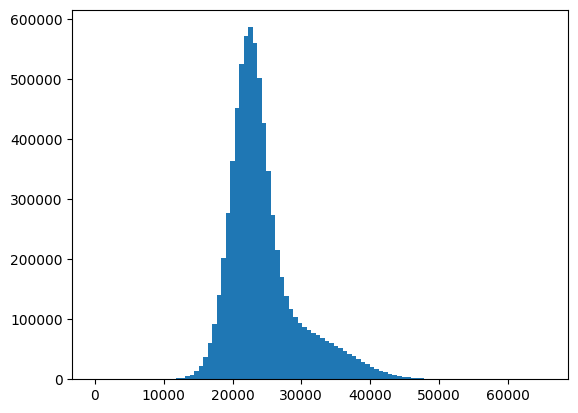

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Assuming this is a 2D slice extracted from a 3D image
slice_file = 'C:/Users/ndnewcomb/Desktop/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_/2.51um_LADAF-2020-27_lung-left_FSC-A_jp2_00000.jp2'  # Replace with the path to your 2D image slice
slice_data = plt.imread(slice_file)

# Inspect the histogram to determine the threshold
plt.hist(slice_data.flatten(), bins=100)
plt.show()